## Run gimme

In [1]:
import glob
import os
import sys
dm6 = "../genome/dm6.fa"

In [2]:
import run_gimme
tf = "br"
# tf_name = tf
# meme_in = 'Results/%s/%s.meme' % (tf,tf)
# #meme_in = 

# results_path = "Results/"+ tf
genome = dm6

In [3]:
tf_list = ["lola", "pan", "usp", "Dfd", "h", "Su(H)", "Trl", "br"]

In [4]:
for tf in tf_list:
    tf2 = tf.replace("(","").replace(")","")
    meme_in = 'Results/%s/%s.meme' % (tf2,tf2)
    results_path = "Results/"+ tf2
    chip_list = glob.glob("../At100/dm/"+ tf2 + "/*")
    run_gimme.run_gimme(tf2,meme_in,chip_list,results_path,genome,figure=True)

In [5]:
gimme_out = "Results/lola/lola.gimme"
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

gimme = pd.read_table(gimme_out)
new_gimme = pd.pivot_table(gimme, index=['Motif'])
new_gimme = new_gimme.sort_values(by="ROC AUC", axis=0, ascending=False)
labels = new_gimme.index
x = 10
if len(labels) > 50:
    x = 15
elif len(labels) < 10:
    x = 5

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(x, 10), sharex=True, dpi=300)
a = sns.barplot(x=labels, y=new_gimme["ROC AUC"],
                palette='colorblind', order=labels, ax=ax1)
b = sns.barplot(x=labels, y=new_gimme["PR AUC"],
                palette="colorblind", order=labels, ax=ax2)
c = sns.barplot(x=labels, y=new_gimme["Enr. at 1% FPR"],
                palette="colorblind", order=labels, ax=ax3)
d = sns.barplot(x=labels, y=new_gimme["Recall at 10% FDR"],
                palette="colorblind", order=labels, ax=ax4)
e = sns.barplot(x=labels, y=new_gimme["P-value"],
                 palette="colorblind", order=labels, ax=ax5)

a.set_xlabel("")
b.set_xlabel("")
c.set_xlabel("")
d.set_xlabel("")
e.set_xticklabels(labels, rotation=90)
e.set_xlabel("Motif",fontdict={'fontsize': 12, 'fontweight': 'semibold'})
sns.despine()
#f.tight_layout()
f = plt.gcf()
#f.savefig(figure_out, bbox_inches='tight')

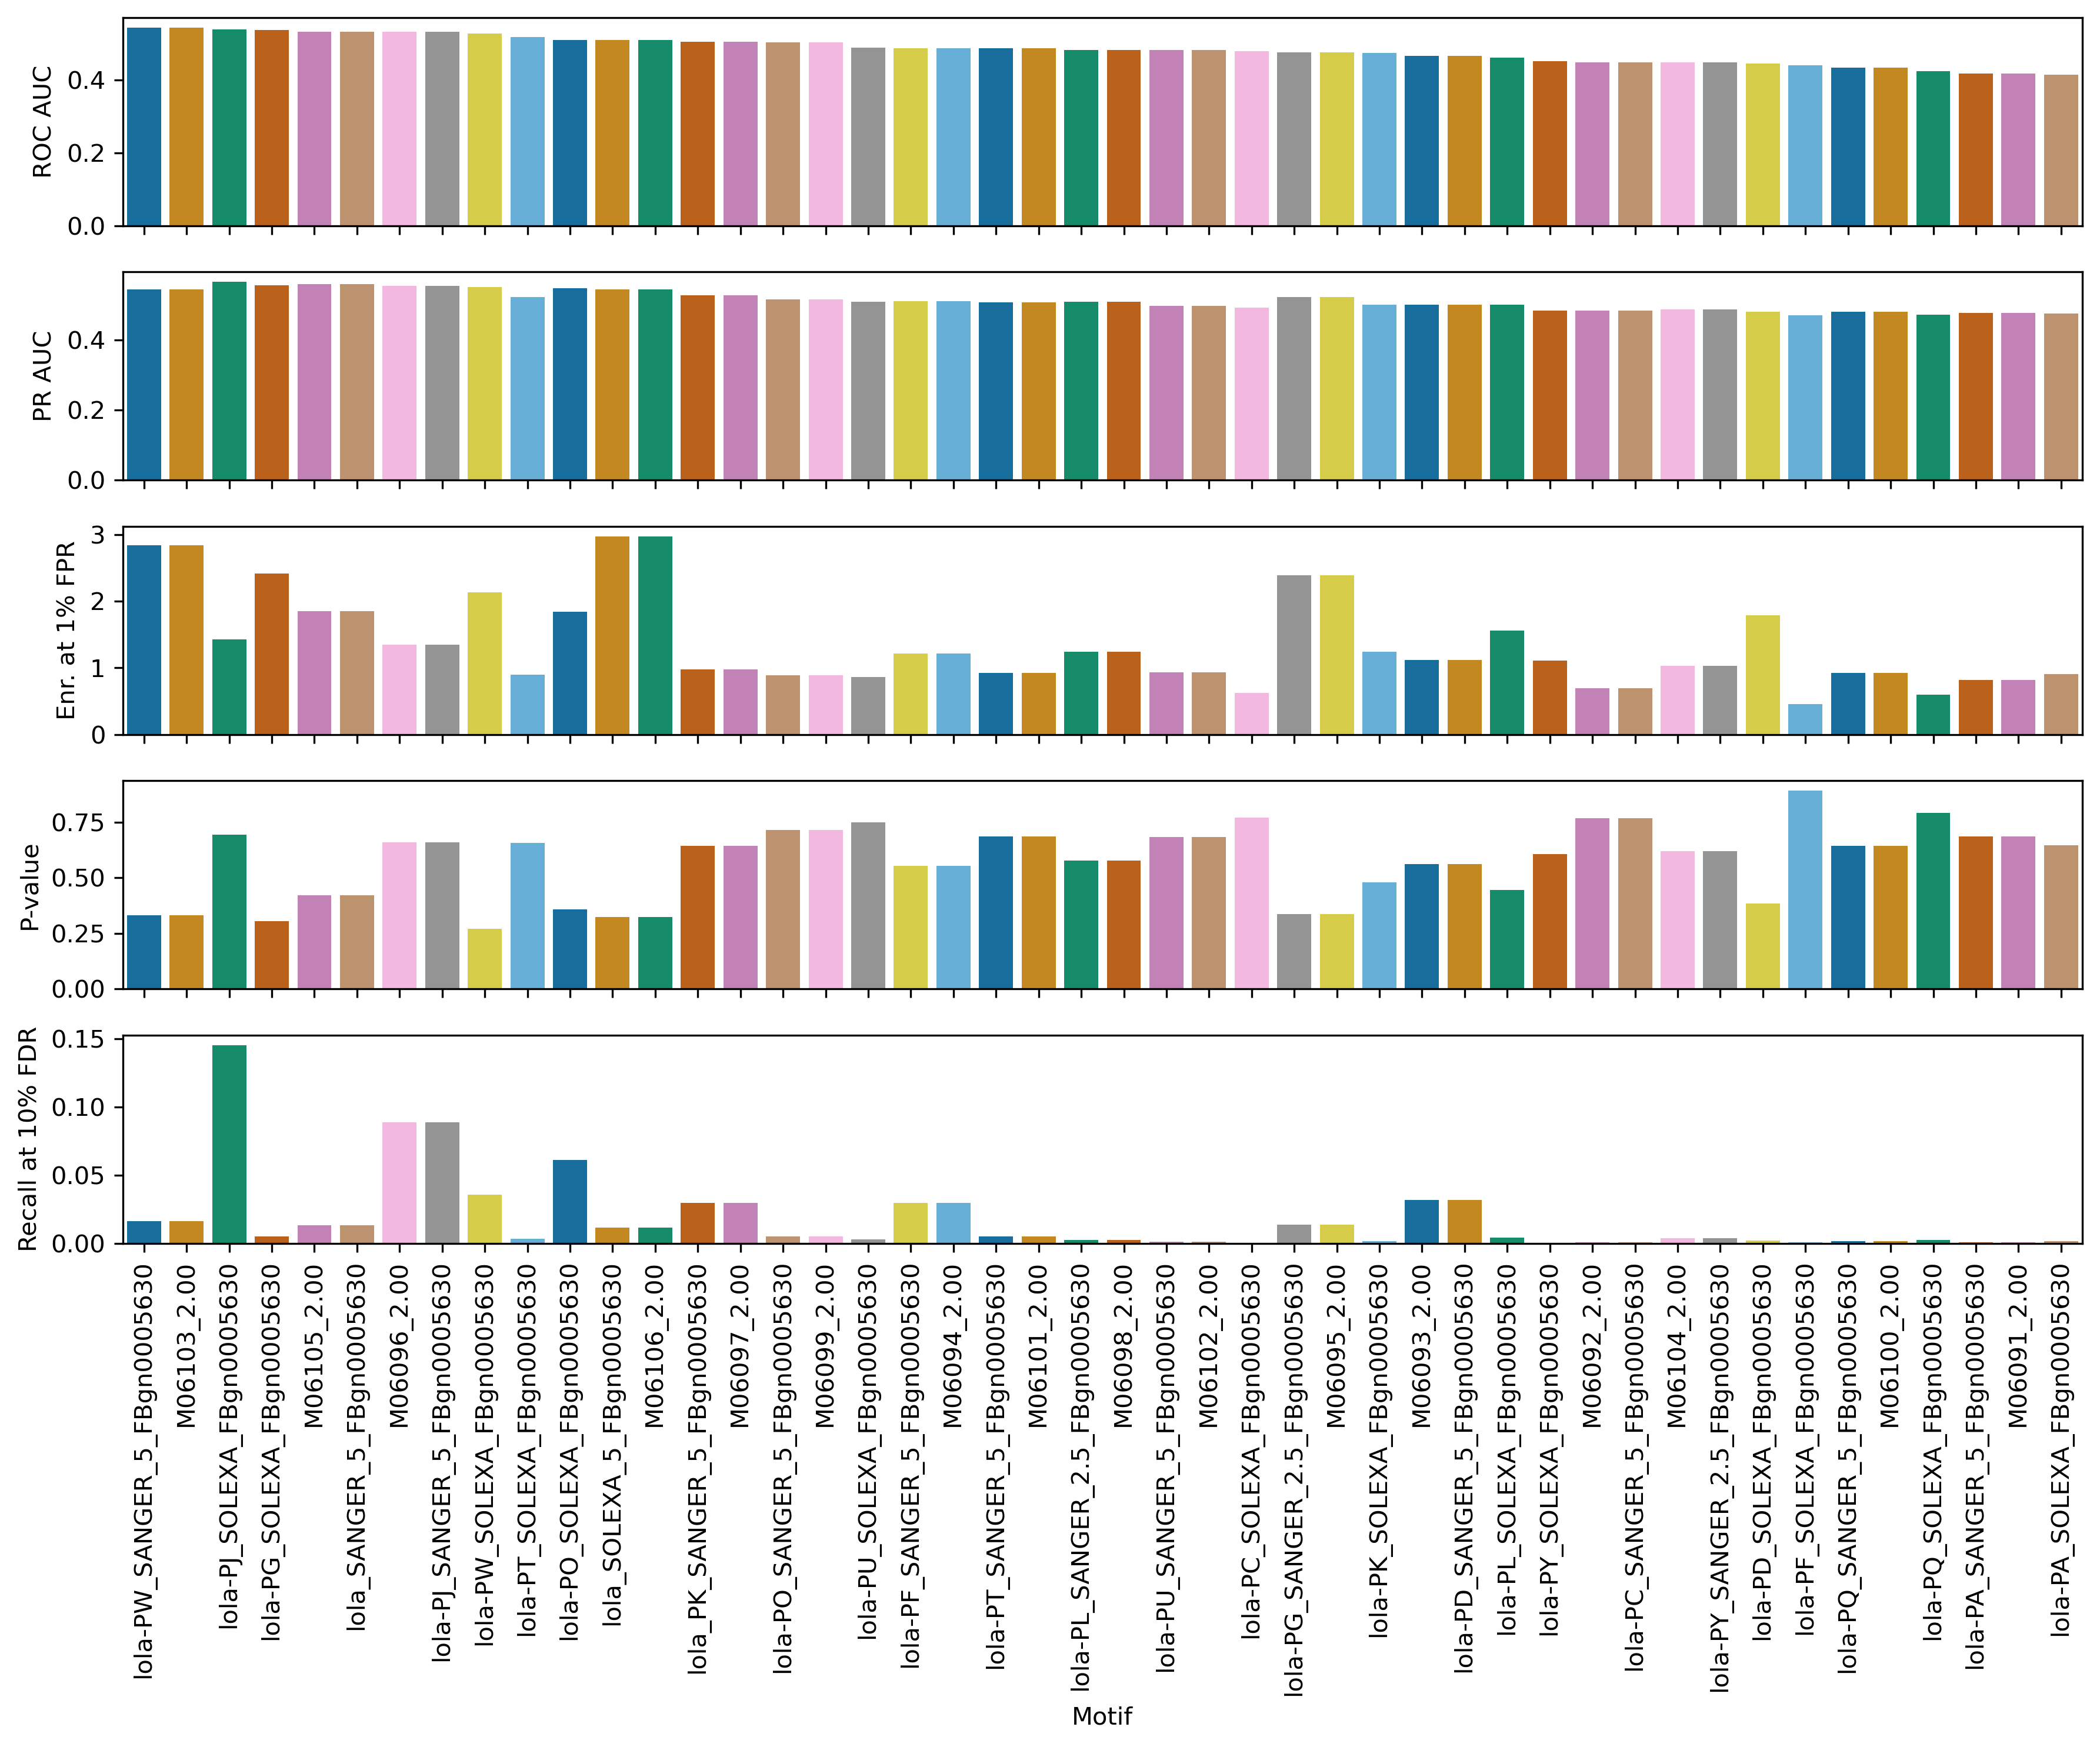

In [6]:
%matplotlib inline
fig = plt.figure(figsize=(12, 10),dpi=300)
ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)

sns.barplot(x=labels, y=new_gimme["ROC AUC"],
                palette='colorblind', order=labels, ax=ax1)
sns.barplot(x=labels, y=new_gimme["PR AUC"],
                palette="colorblind", order=labels, ax=ax2)
sns.barplot(x=labels, y=new_gimme["Enr. at 1% FPR"],
                palette="colorblind", order=labels, ax=ax3)
sns.barplot(x=labels, y=new_gimme["P-value"],
                 palette="colorblind", order=labels, ax=ax4)
sns.barplot(x=labels, y=new_gimme["Recall at 10% FDR"],
                palette="colorblind", order=labels, ax=ax5)

ax1.set_xticklabels("")
ax1.set_xlabel("")
ax2.set_xticklabels("")
ax2.set_xlabel("")
ax3.set_xticklabels("")
ax3.set_xlabel("")
ax4.set_xticklabels("")
ax4.set_xlabel("")
ax5.set_xticklabels(labels, rotation=90)
#sns.despine(left=True)

fig.tight_layout()
f = plt.gcf()
plt.show()

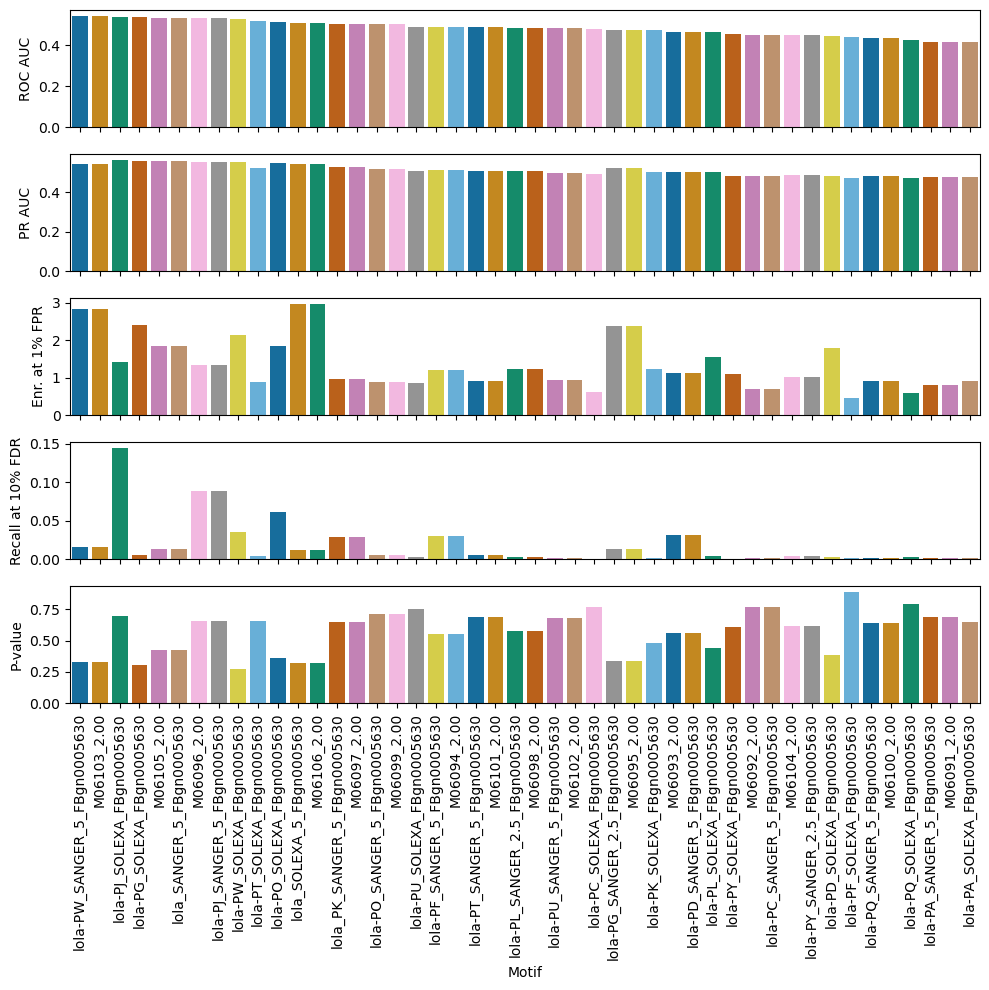

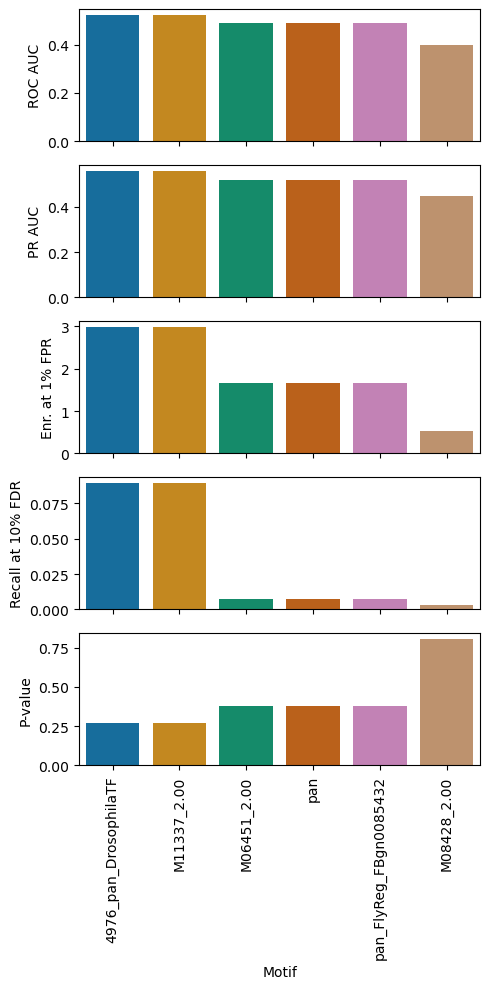

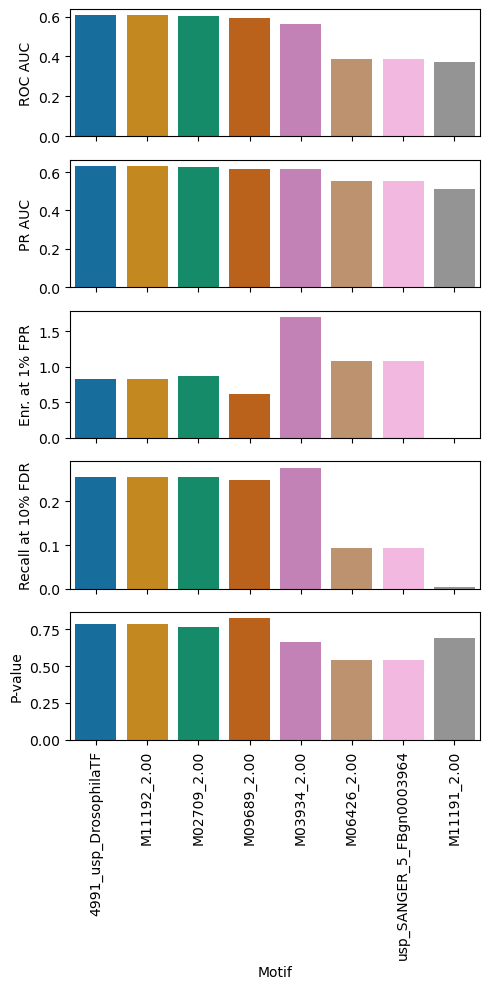

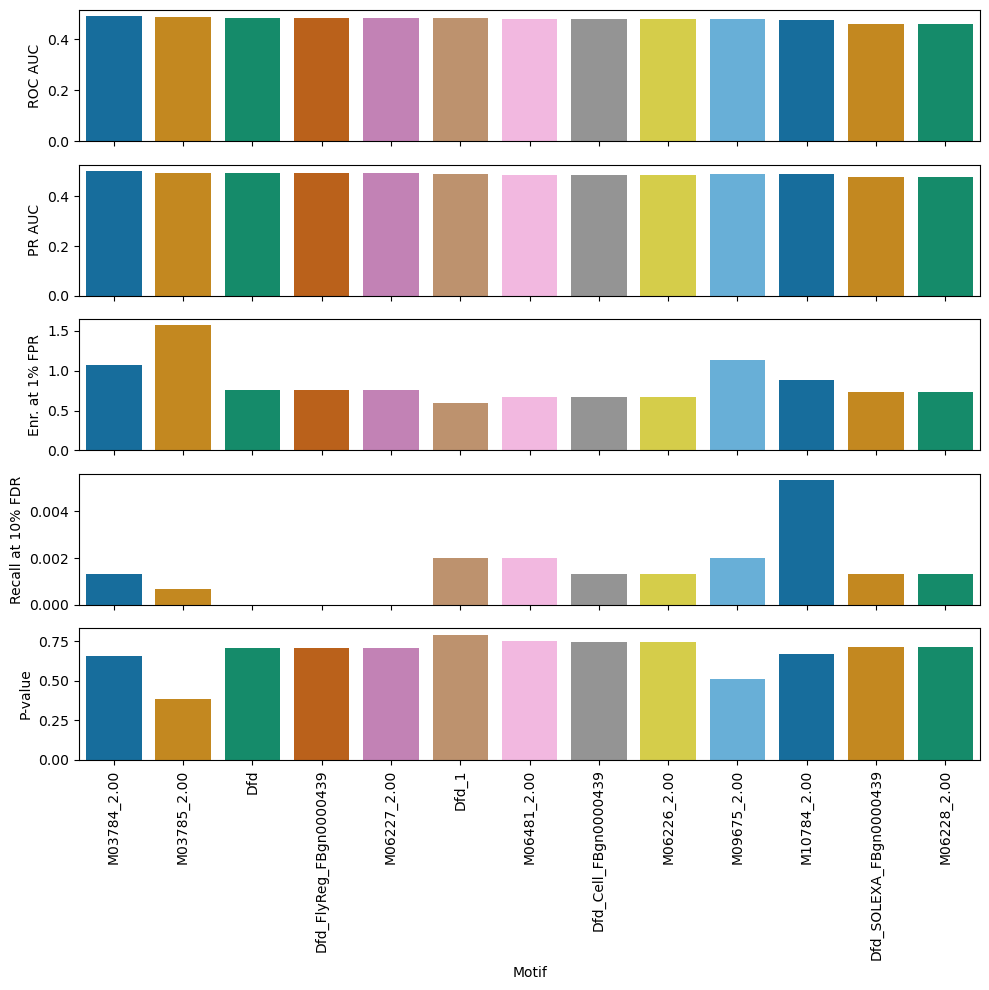

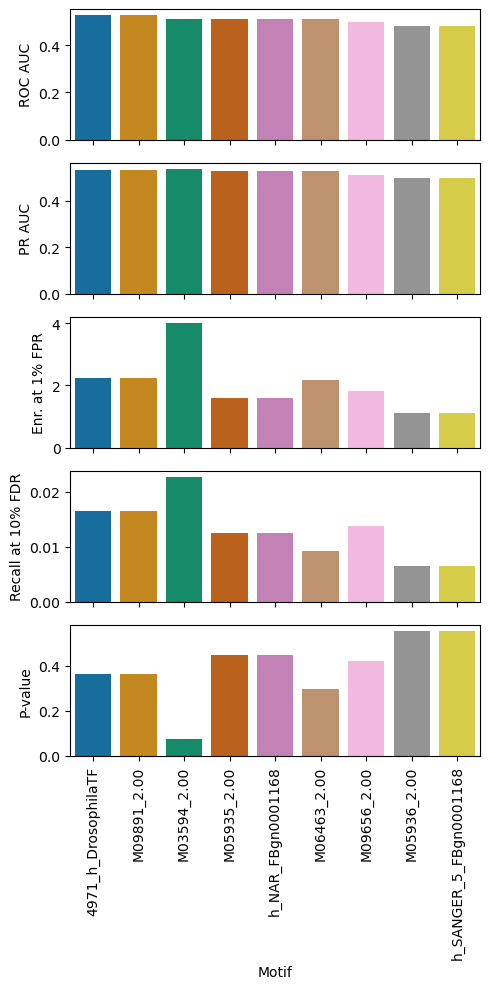

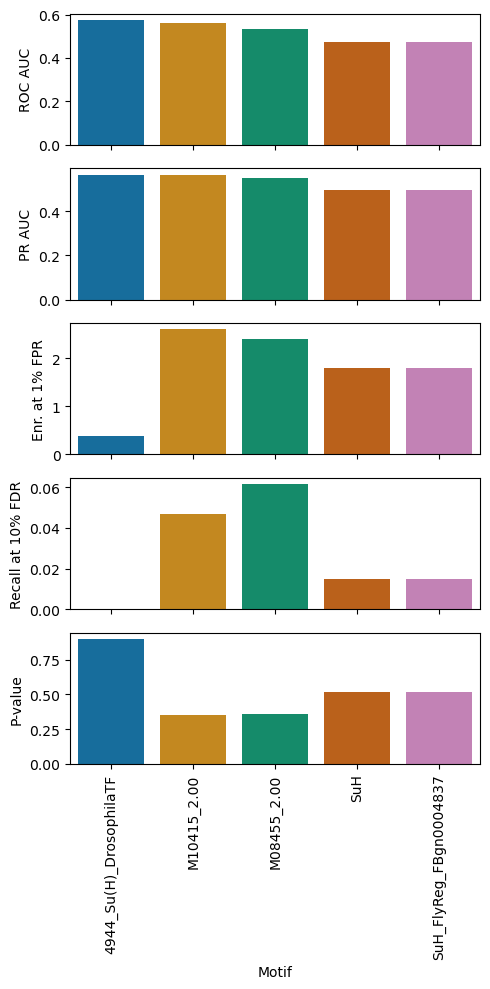

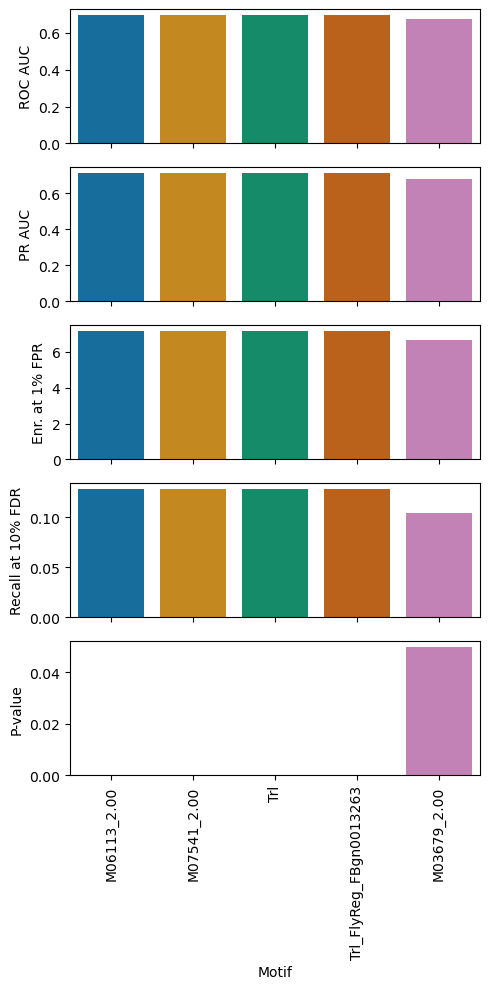

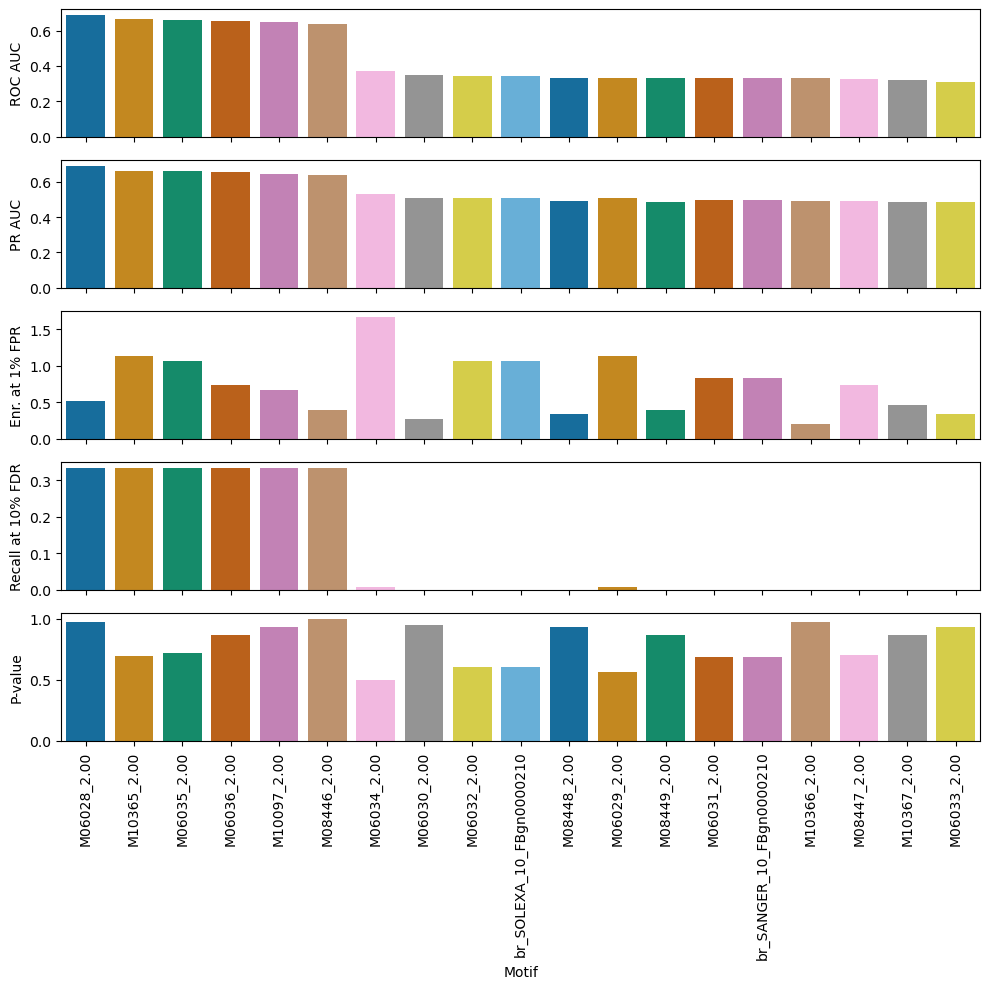

In [9]:
for tf in tf_list:
    tf2 = tf.replace("(","").replace(")","")
    gimme_out = (f"Results/{tf2}/{tf2}.gimme")
    gimme = pd.read_table(gimme_out)
    new_gimme = pd.pivot_table(gimme, index=['Motif'])
    new_gimme = new_gimme.sort_values(by="ROC AUC", axis=0, ascending=False)
    labels = new_gimme.index
    x = 10
    if len(labels) > 50:
        x = 15
    elif len(labels) < 10:
        x = 5
    elif len(labels) < 6:
        x = 3
    fig = plt.figure(figsize=(x, 10),dpi=100)
    ax1 = fig.add_subplot(5,1,1)
    ax2 = fig.add_subplot(5,1,2)
    ax3 = fig.add_subplot(5,1,3)
    ax4 = fig.add_subplot(5,1,4)
    ax5 = fig.add_subplot(5,1,5)

    sns.barplot(x=labels, y=new_gimme["ROC AUC"],
                    palette='colorblind', order=labels, ax=ax1)
    sns.barplot(x=labels, y=new_gimme["PR AUC"],
                    palette="colorblind", order=labels, ax=ax2)
    sns.barplot(x=labels, y=new_gimme["Enr. at 1% FPR"],
                    palette="colorblind", order=labels, ax=ax3)
    sns.barplot(x=labels, y=new_gimme["P-value"],
                     palette="colorblind", order=labels, ax=ax5)
    sns.barplot(x=labels, y=new_gimme["Recall at 10% FDR"],
                    palette="colorblind", order=labels, ax=ax4)

    ax1.set_xticklabels("")
    ax1.set_xlabel("")
    ax2.set_xticklabels("")
    ax2.set_xlabel("")
    ax3.set_xticklabels("")
    ax3.set_xlabel("")
    ax4.set_xticklabels("")
    ax4.set_xlabel("")
    ax5.set_xticklabels(labels, rotation=90)
    #sns.despine(left=True)

    fig.tight_layout()
    f = plt.gcf()
    plt.show()

## Motif discovery with GIMME

We use this to test the utility of consistency based motif assessment, especially using Tomtom in motif discovery. The steps are as follows:
1. Perform motif discovery using gimme motifs and keep intermediate data (Use 50%)
2. Use Tomtom and motif clustering to get the best three motifs from motif discovery
3. Compare the perofmance of teh motufs identified purely buy gimme versus those based on tomtom
4. Report



## 1. Data processing

For a given TF, we querried the database for the raw chiP-seq peaks, but for demonsration purpose we just use a single peak file located in the Example folder. Remeber, some Tfs will have upto 50 peak files.


In [6]:
def get_bed_from_peaks(peak, width, downstream_distance):
    """
    Given a bed file, extract the fasta in tab format and eliminate the masked sequences,
    and extract the negative version of the file
    
    """
    #Read the narrow peak file into a pandas DataFrame
    
    peak_file = pd.read_table(peak, header=None)[[0,1,2]]
    
    #Lets widden the coordinates to 100bp centered around the center
    mid = (peak_file[2] + peak_file[1])/2
    peak_file[1] = (mid - width/2+0.5).apply(int)
    peak_file[2]  = (mid + width/2+0.5).apply(int)
    
    #Extract the negative set located 500bp downstream
    neg_bed = peak_file.copy(deep=True)
    
    neg_bed[1] = neg_bed[1]+downstream_distance
    neg_bed[2] = neg_bed[2]+downstream_distance
    
    # Eliminate repeat masked regions from the bed file
    peak_file = remove_repeats(peak_file) #.to_csv(pos_bed_out, index=None, header=None, sep="\t")
    neg_bed = remove_repeats(neg_bed) #.to_csv(neg_bed_out, index=None, header=None, sep="\t")
    
    #hg = "/home/kipkurui/Project/MAT_server/Data/hg19.fa"
    return peak_file, neg_bed
    #pybedtools.BedTool.from_dataframe(peak_file).sequence(fi=hg,).save_seqs(negfa_out)
    
def remove_repeats(dfs):
    """
    Takes a bed file dataframe and eliminated bed
    coordinates that fall within the repeat masked sections
    """
    # The repeats file is derived from USCC
#     repeats = pd.read_table("/home/kipkurui/Downloads/repeat_sites.bed", header=None)
#     repeats = pybedtools.BedTool.from_dataframe(repeats)
    if len(dfs) > 2000:
        get_top = 2000
    else:
        get_top = len(dfs)
    a = pybedtools.BedTool.from_dataframe(dfs.head(2000))
    
    #test = a.subtract(repeats, A=True)
    
    return a.to_dataframe().head(500)

In [9]:
import glob
import pandas as pd
import pybedtools
jun_peaks = glob.glob("./Data/peaks/lola/*")

pos_bed_df = pd.DataFrame()
neg_bed_df = pd.DataFrame()
for peak in jun_peaks:
    width = 100
    downstream_distance = 500
    
    bed_df = get_bed_from_peaks(peak, width, downstream_distance)
    
    pos_bed_df = pos_bed_df.append(bed_df[0], ignore_index=True)
    neg_bed_df = neg_bed_df.append(bed_df[1], ignore_index=True)

In [20]:
discover_out = "./GimmeMars/lola_discover.fa"
test_pos_out = "./GimmeMars/lola_test_pos.fa"
test_neg_out = "./GimmeMars/lola_test_neg.fa"
import numpy as np
dm = "../genome/dm6.fa"

randomized_pos = pos_bed_df.reindex(np.random.permutation(pos_bed_df.index))

discover = randomized_pos.head(len(pos_bed_df)*4//5)

test_pos = randomized_pos.tail(len(pos_bed_df)//5)

#for negative, we just sample a subset similar to the test positive set
test_neg = neg_bed_df.sample(len(pos_bed_df)//5)

#Then for each of the sets, lets get the fasta sequences
pybedtools.BedTool.from_dataframe(discover).sequence(fi=dm,).save_seqs(discover_out)

pybedtools.BedTool.from_dataframe(test_pos).sequence(fi=dm,).save_seqs(test_pos_out)

pybedtools.BedTool.from_dataframe(test_neg).sequence(fi=dm,).save_seqs(test_neg_out)


<BedTool(/tmp/pybedtools.3s_wpbr6.tmp)>

In [34]:
mot_algorithms = "MDmodule,MEME,MotifSampler,trawler,Improbizer,BioProspector,Posmo,ChIPMunk,AMD,HMS,Homer"
#for tf_id in chipseq:
tf_id = "lola"
results_path = "./GimmeMars" #% tf_id
#    if tf_id == "Tf_id":
#        continue
#    else:
!gimme motifs {results_path}/{tf_id}_discover.fa {results_path}/{tf_id}_discover -k -t {mot_algorithms} --nogc --rawscore -g {dm}

2020-06-24 10:51:12,733 - INFO - creating background (matched GC%)
Traceback (most recent call last):
  File "/home/festo/miniconda3/envs/gimme/bin/gimme", line 11, in <module>
    cli(sys.argv[1:])
  File "/home/festo/miniconda3/envs/gimme/lib/python3.7/site-packages/gimmemotifs/cli.py", line 625, in cli
    args.func(args)
  File "/home/festo/miniconda3/envs/gimme/lib/python3.7/site-packages/gimmemotifs/commands/motifs.py", line 75, in motifs
    number=10000,
  File "/home/festo/miniconda3/envs/gimme/lib/python3.7/site-packages/gimmemotifs/background.py", line 122, in create_background_file
    m = MatchedGcFasta(inputfile, genome, number=number, size=size)
  File "/home/festo/miniconda3/envs/gimme/lib/python3.7/site-packages/gimmemotifs/background.py", line 559, in __init__
    matched_gc_bedfile(tmpbed, matchfile, genome, number, size=size)
  File "/home/festo/miniconda3/envs/gimme/lib/python3.7/site-packages/gimmemotifs/background.py", line 533, in matched_gc_bedfile
    df.loc[d